<a href="https://colab.research.google.com/github/parasgupta1995/cardioviscular-risk-prediction/blob/main/cardioviscular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Capstone project/Cardiovascular disease prediction/data_cardiovascular_risk.csv")

In [4]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#Here in case cardiovasicular risk prediction,the id and education column is not reasons which can effect causes for cardiovasicular risk
#Thus dropping them
data.drop(columns=['id','education'], inplace=True)

In [6]:
data.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB


### 1. EDA

Age categories
 

*   Age in range 20-39 then Young-Adults
*   Age in range 40-59 then Middle-Aged Adults
*   Age > 60 senior

cite:https://academic.oup.com/gerontologist/article/42/1/92/641498

In [8]:
# Segregating the people based on their age 
def age_category(age):
  if age<=14:
    age_category='child'

  elif 15<= age <=24:
    age_category='teen' 

  elif 20<= age <=39:
    age_category='Young-Adults'

  elif 40<= age <=59:
    age_category='Middle-Aged Adults' 

  else:
    age_category='senior'

  return age_category 

age_cat=pd.DataFrame(data['age'].apply(lambda x: age_category(x)))
age_cat_CHD=pd.DataFrame(data[data['TenYearCHD']==1]['age'].apply(lambda x: age_category(x)))

* age_cat represent dataframe of total number of people based on age category.
* age_cat_CHD represent dataframe of people suffering from CHD based on age category

In [9]:
age_cat_total=pd.DataFrame(age_cat.value_counts()).reset_index()
age_cat_total.columns=['age_cat','Total number of people']

In [10]:
age_cat_affected_CHD=pd.DataFrame(age_cat_CHD.value_counts()).reset_index()
age_cat_affected_CHD.columns=['age_cat','Affected by CHD']

In [12]:
age_df=pd.concat([age_cat_total,age_cat_affected_CHD['Affected by CHD']],axis=1)

,age_cat,Total number of people,Affected by CHD
0,Middle-Aged Adults,2377,333
1,senior,557,159
2,Young-Adults,456,19


In [17]:
age_df['Percent affected by CHD']=age_df.apply(lambda x: x['Affected by CHD']/x['Total number of people']*100,axis=1)

Text(0.5, 0, 'Age category')

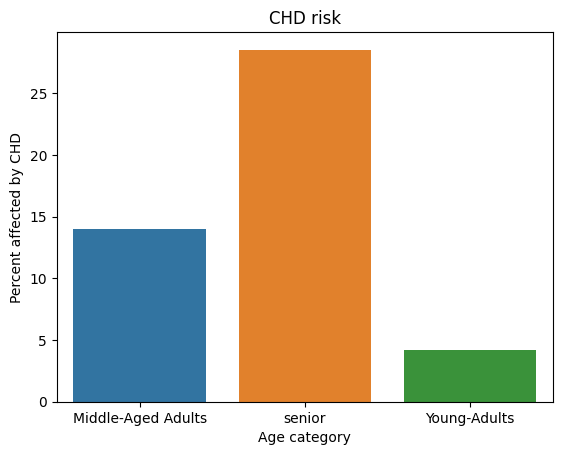

In [22]:
fig,ax=plt.subplots()
ax=sns.barplot(x=age_df['age_cat'],y=age_df['Percent affected by CHD'])
ax.set_title('CHD risk')
ax.set_xlabel('Age category')

CHD is more likely to occur for older people as compare to younger people. 
* Approximately 5 young people had a chance of having CHD in 100 people 
* while 14 middle aged adult in 100 people and 28 people incase of senior.

In [ ]:
# Number of people who smoke had chance of cardiovasicular risk
